# Linear Regression

In [68]:
# General Libraries
import warnings

# Data Analysis & Visualization
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import chi2, SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.shape

(1338, 7)

In [5]:
len(df[df.isna().any(axis=1)])

0

In [6]:
for i in df.columns:
    if len(df[i].unique()) > 15:
        print(len(df[i].unique()))
    else:
        print(df[i].unique())

47
['female' 'male']
548
[0 1 3 2 5 4]
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']
1337


In [7]:
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        print(i.capitalize())
        print('\tMin:', df[i].min())
        print('\tMax:', df[i].max())

Age
	Min: 18
	Max: 64
Bmi
	Min: 15.96
	Max: 53.13
Children
	Min: 0
	Max: 5
Charges
	Min: 1121.8739
	Max: 63770.42801


In [8]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df.drop_duplicates(inplace=True)
df.shape

(1337, 7)

### EDA Anlysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


#### Univariate Variables - Categorical

<Axes: xlabel='region', ylabel='Count'>

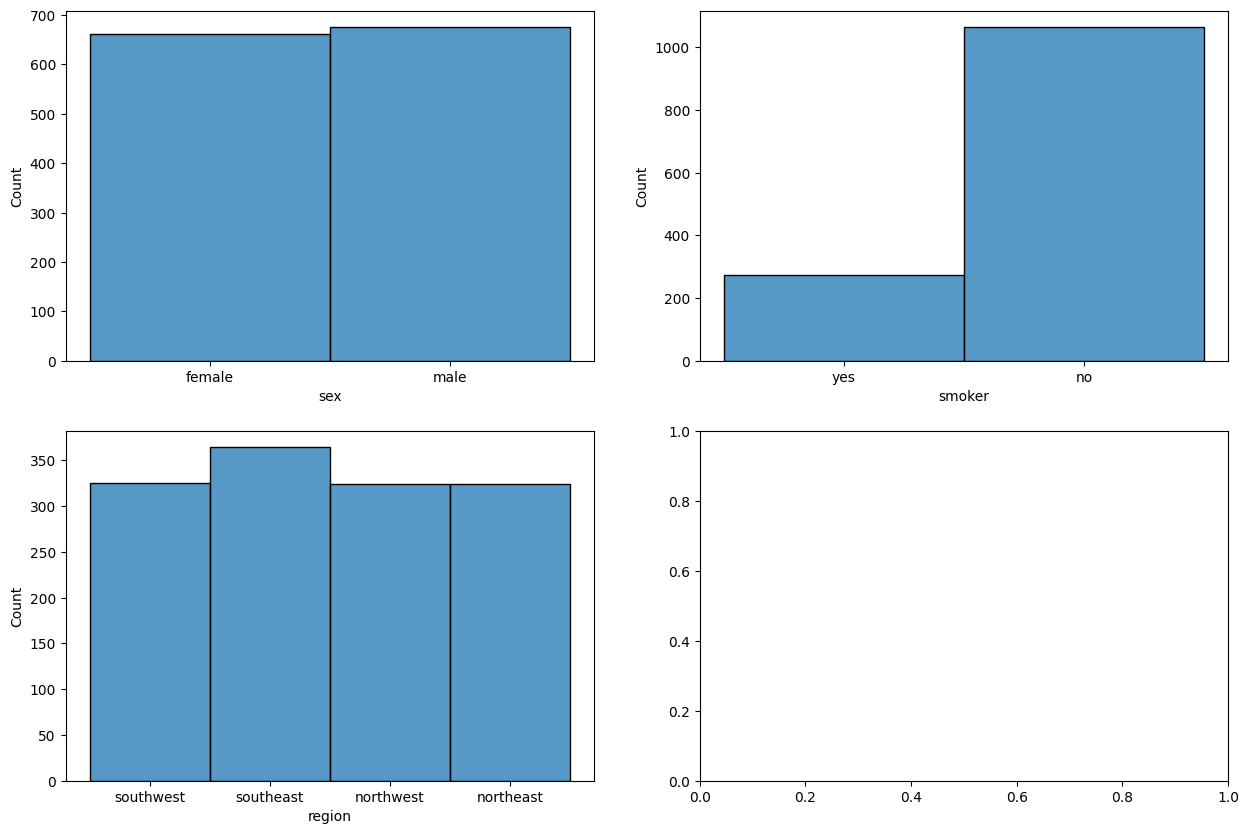

In [11]:
fig, axis = plt.subplots(
    nrows=2, 
    ncols=2,
    figsize = (
        15, 10
    )
)

sns.histplot(
    ax = axis[0,0],
    data = df,
    x = 'sex'
)
sns.histplot(
    ax = axis[0,1],
    data = df,
    x = 'smoker'
)
sns.histplot(
    ax = axis[1,0],
    data = df,
    x = 'region'
)

* There's no much difference between the quantity of males and females
* There's a huge gap between smokers and non-smokers, predominantly we have people who don't smoke
* People is mostly concentrated in the southeast region, but there's no much difference with the other regions, the other regions have pretty much the same amount of people

#### Univariate Variables - Numerical

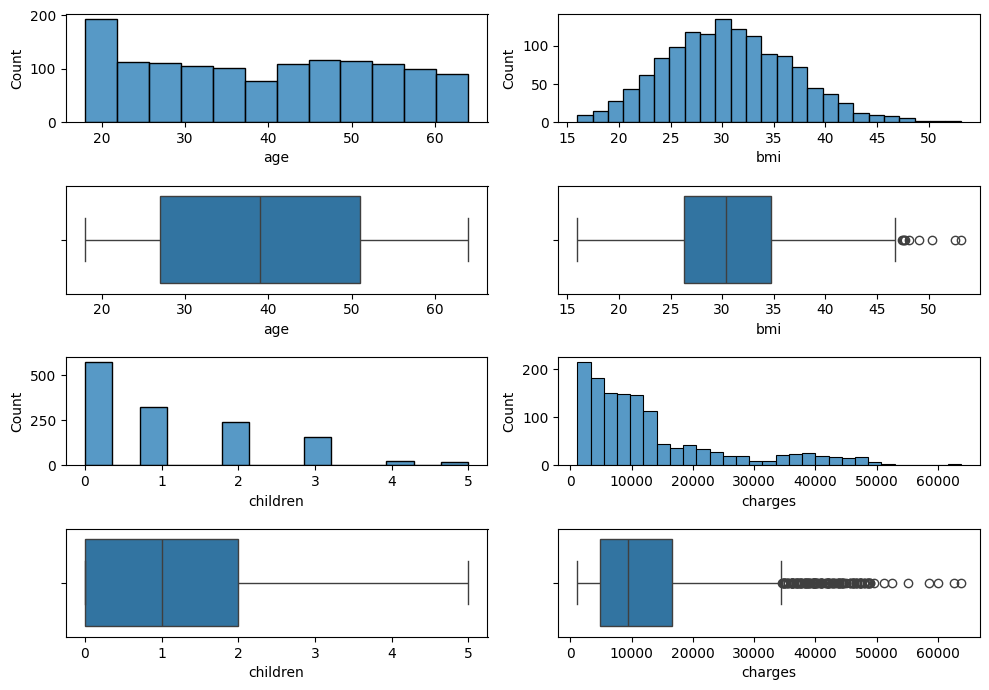

In [12]:
fig, axis = plt.subplots(
    nrows = 4,
    ncols = 2,
    figsize = (
        10, 7
    )
)

#######################################

sns.histplot(
    ax = axis[0,0],
    data = df,
    x = 'age'
)
sns.boxplot(
    ax = axis[1,0],
    data = df,
    x = 'age'
)

#######################################

sns.histplot(
    ax = axis[0,1],
    data = df,
    x = 'bmi'
)
sns.boxplot(
    ax = axis[1,1],
    data = df,
    x = 'bmi'
)

#######################################

sns.histplot(
    ax = axis[2,0],
    data = df,
    x = 'children'
)
sns.boxplot(
    ax = axis[3,0],
    data = df,
    x = 'children'
)

#######################################

sns.histplot(
    ax = axis[2,1],
    data = df,
    x = 'charges'
)
sns.boxplot(
    ax = axis[3,1],
    data = df,
    x = 'charges'
)

#######################################

plt.tight_layout()

plt.show()

* The ages are fairly distributed, but the peak is at 20yo, after that all ages are around 100 people
* The people's BMI is mostly between 25 to 35, which suggest that most people are overweight or even suffer obesity
* Most of the people have 0 children, but is pretty much normal to have 1, just a little bit of the people have more than 3 children which suggest a good birth planning even for those with more than 3
* Most of the charges are between 0 and 1000-ish, more than 4000 is rare and between 3K and 3.5K there's a significatn decrease on the people that pay those amounts

#### Multivariate Variables - (Categorical Categorical)

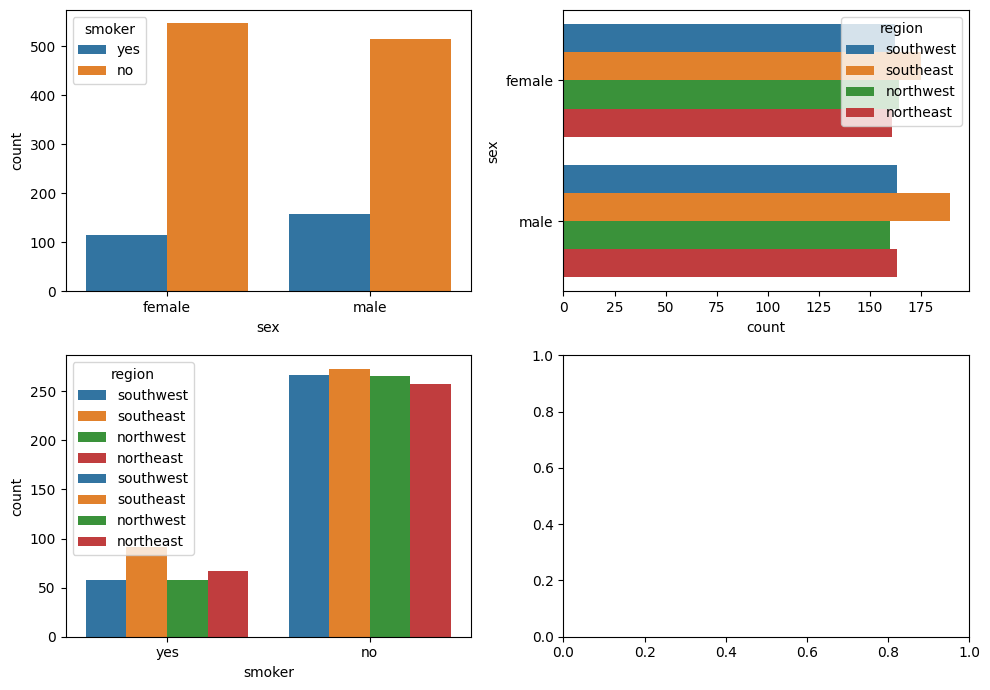

In [13]:
fig, axis = plt.subplots(
    nrows = 2,
    ncols = 2,
    figsize = (
        10, 7
    )
)

sns.countplot(
    ax = axis[0,0], 
    data = df,
    x = 'sex',
    hue = 'smoker'
)

sns.countplot(
    ax = axis[0,1],
    data = df,
    y = 'sex',
    hue = 'region'
)

sns.countplot(
    ax = axis[1,0],
    data = df,
    x = 'smoker',
    hue = 'region'
)

sns.countplot(
    ax = axis[1,0],
    data = df,
    x = 'smoker',
    hue = 'region'
)

plt.tight_layout()

plt.show()

* There's no real relations between the categorical variables:
    * The only thing that stand out is that female smokers are more than the male smokers by just a tiny bit
    * There seem to be more men than women in total
    * Males and females are both fairly distributed between regions

#### Multivariate Variables - (Categorical Numerical)

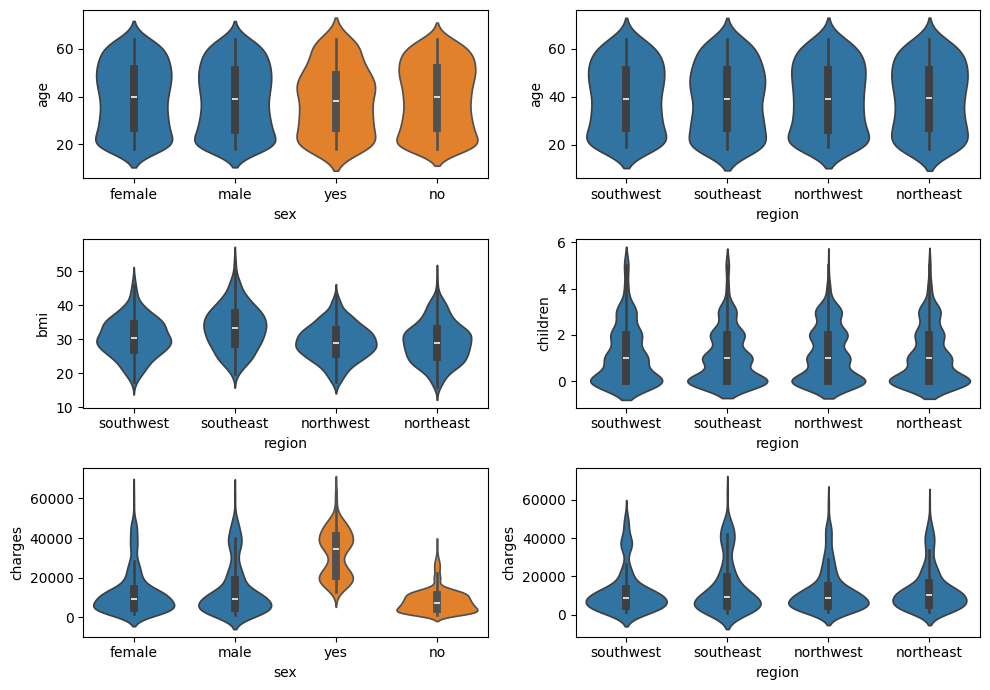

In [14]:
fig, axis = plt.subplots(
    nrows = 3,
    ncols = 2,
    figsize = (
        10, 7
    )
)

sns.violinplot(ax = axis[0,0], x = 'sex', y = 'age', data = df)
sns.violinplot(ax = axis[0,0], x = 'smoker', y = 'age', data = df)
sns.violinplot(ax = axis[0,1], x = 'region', y = 'age', data = df)

sns.violinplot(ax = axis[1,0], x = 'region', y = 'bmi', data = df)
sns.violinplot(ax = axis[1,1], x = 'region', y = 'children', data = df)

sns.violinplot(ax = axis[2,0], x = 'sex', y = 'charges', data = df)
sns.violinplot(ax = axis[2,1], x = 'region', y = 'charges', data = df)
sns.violinplot(ax = axis[2,0], x = 'smoker', y = 'charges', data = df)

plt.tight_layout()

plt.show()

#### Multivariate Variables - (Numerical Numerical)

<Axes: >

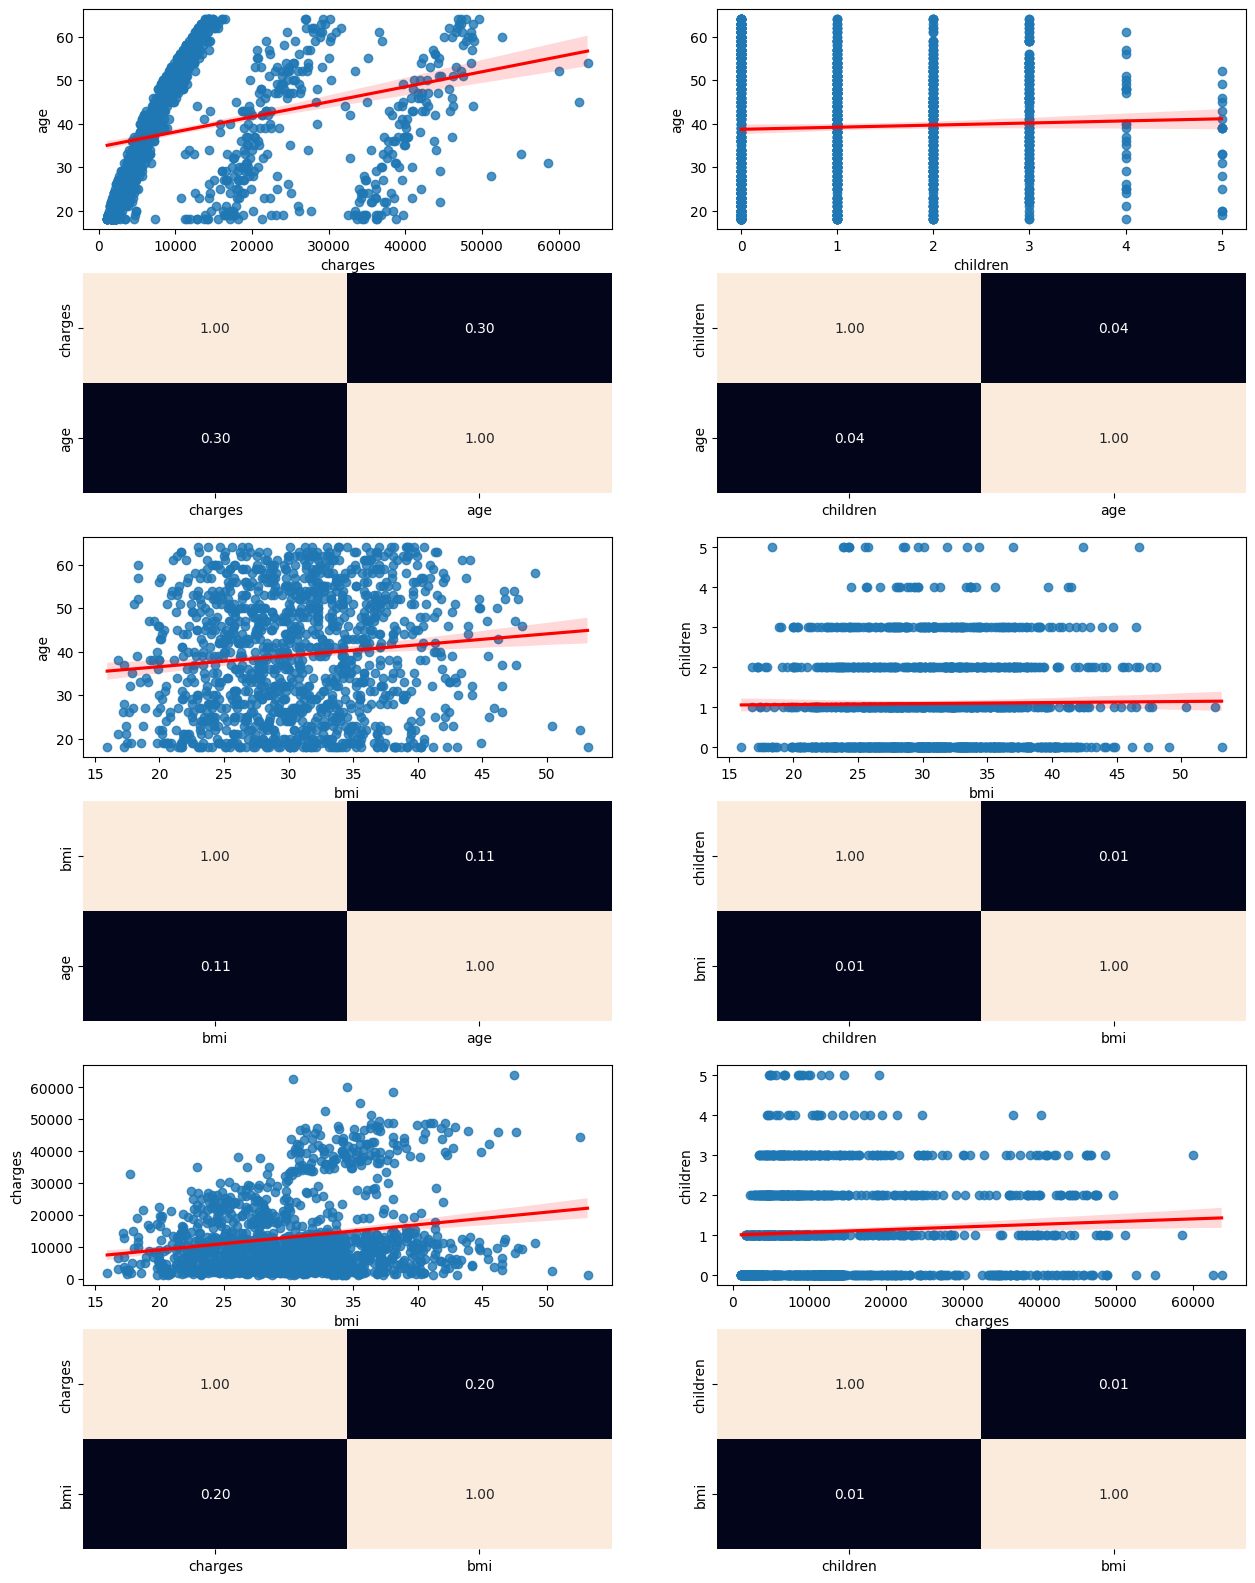

In [15]:
fig, axis = plt.subplots(
    nrows = 6, 
    ncols = 2,
    figsize = (
        15, 20
    )
)

##############################

sns.regplot(
    ax = axis[0,0],
    data = df,
    x = 'charges',
    y = 'age',
    line_kws = {
        'color': 'red'
    }
)
sns.heatmap(
    df[
        [
            "charges", 
            'age'
        ]
    ].corr(), 
    annot = True, 
    fmt = ".2f", 
    ax=axis[1,0], 
    cbar = False
)

##############################

sns.regplot(
    ax = axis[0,1],
    data = df,
    x = 'children',
    y = 'age',
    line_kws = {
        'color': 'red'
    }
)
sns.heatmap(
    df[
        [
            'children',
            'age'
        ]
    ].corr(),
    annot = True,
    fmt = '.2f',
    ax = axis[1,1],
    cbar = False
)

##############################

sns.regplot(
    ax = axis[2,0],
    data = df,
    x = 'bmi',
    y = 'age',
    line_kws = {
        'color': 'red'
    }
)
sns.heatmap(
    df[
        [
            'bmi',
            'age'
        ]
    ].corr(),
    annot = True,
    fmt = ".2f",
    ax = axis[3,0],
    cbar = False
)

##############################

sns.regplot(
    ax = axis[2,1],
    data = df,
    x = 'bmi',
    y = 'children',
    line_kws = {
        'color': 'red'
    }
)
sns.heatmap(
    df[
        [
            'children',
            'bmi'
        ]
    ].corr(),
    annot = True,
    fmt = ".2f",
    ax = axis[3,1],
    cbar = False
)

##############################

sns.regplot(
    ax = axis[4,0],
    data = df,
    x = 'bmi',
    y = 'charges',
    line_kws = {
        'color': 'red'
    }
)
sns.heatmap(
    df[
        [
            'charges',
            'bmi'
        ]
    ].corr(),
    annot = True,
    fmt = ".2f",
    ax = axis[5,0],
    cbar = False
)

##############################

sns.regplot(
    ax = axis[4,1],
    data = df,
    x = 'charges',
    y = 'children',
    line_kws = {
        'color': 'red'
    }
)
sns.heatmap(
    df[
        [
            'children',
            'bmi'
        ]
    ].corr(),
    annot = True,
    fmt = ".2f",
    ax = axis[5,1],
    cbar = False
)

In [16]:
df['sex'] = pd.factorize(df['sex'])[0]
df['smoker'] = pd.factorize(df['smoker'])[0]
df['region'] = pd.factorize(df['region'])[0]

<Axes: >

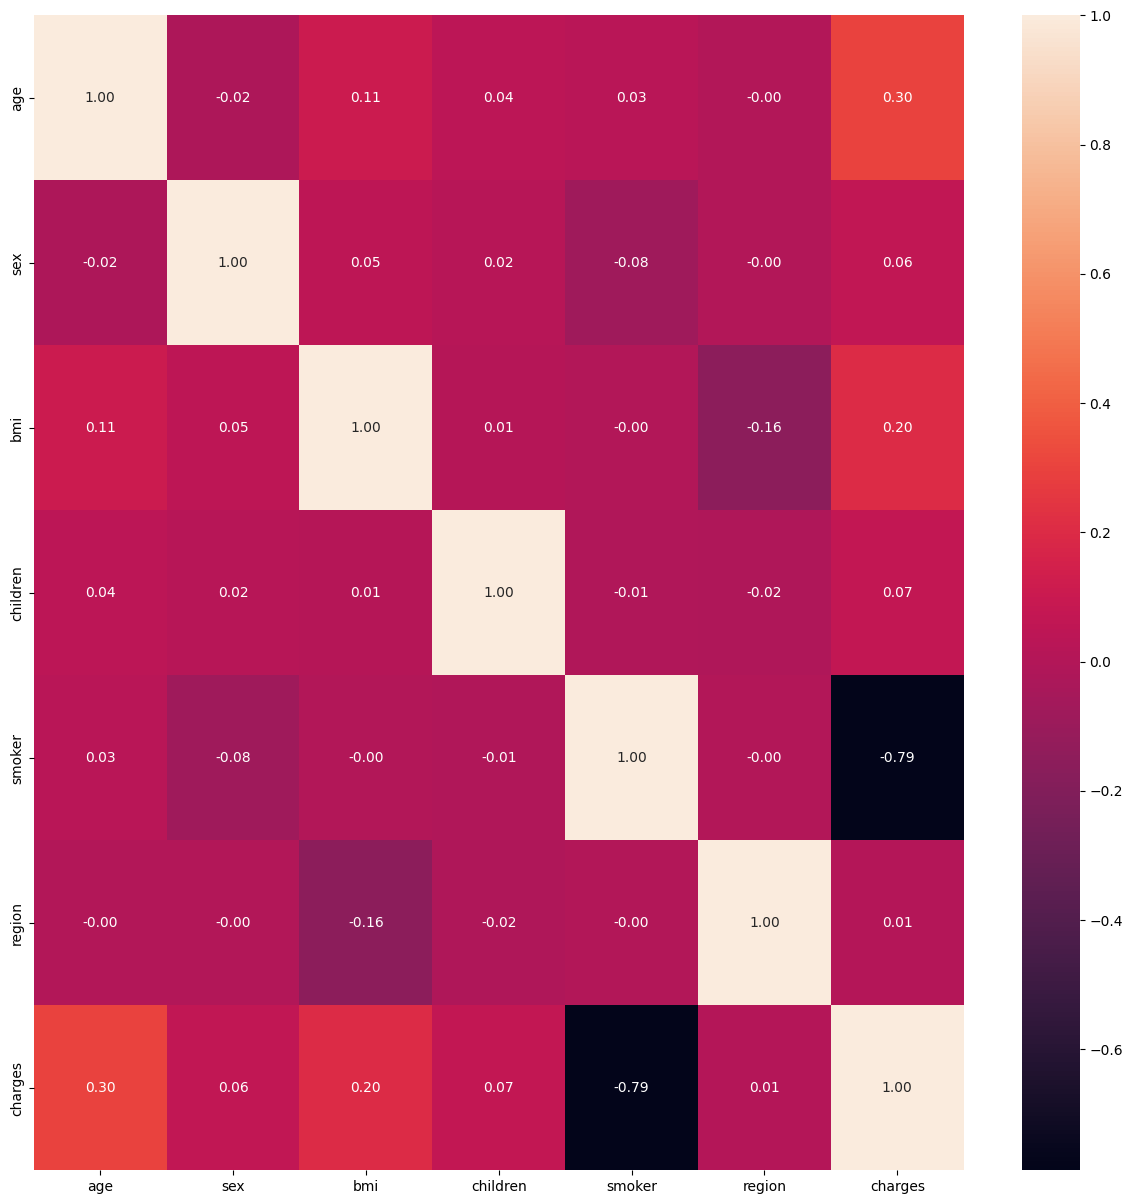

In [17]:
fig, axis = plt.subplots(
    figsize = (
        15, 15
    )
)

sns.heatmap(
    df[
        df.columns.tolist()
    ].corr(),
    annot = True,
    fmt = ".2f"
)

* A positive correlation coefficient indicates a positive relationship. 
    * 0.30 for age-charges means age increases, charges tends to increase too
    * 0.20 for bmi-charges means bmi increases, charges tends to increase too
* A negative correlation coefficient indicates a negative relation.
    * -0.79 for smoker-charges indicates a negative relationship which means, on average, individuals who smoke have lower medical charges compared to non-smokers

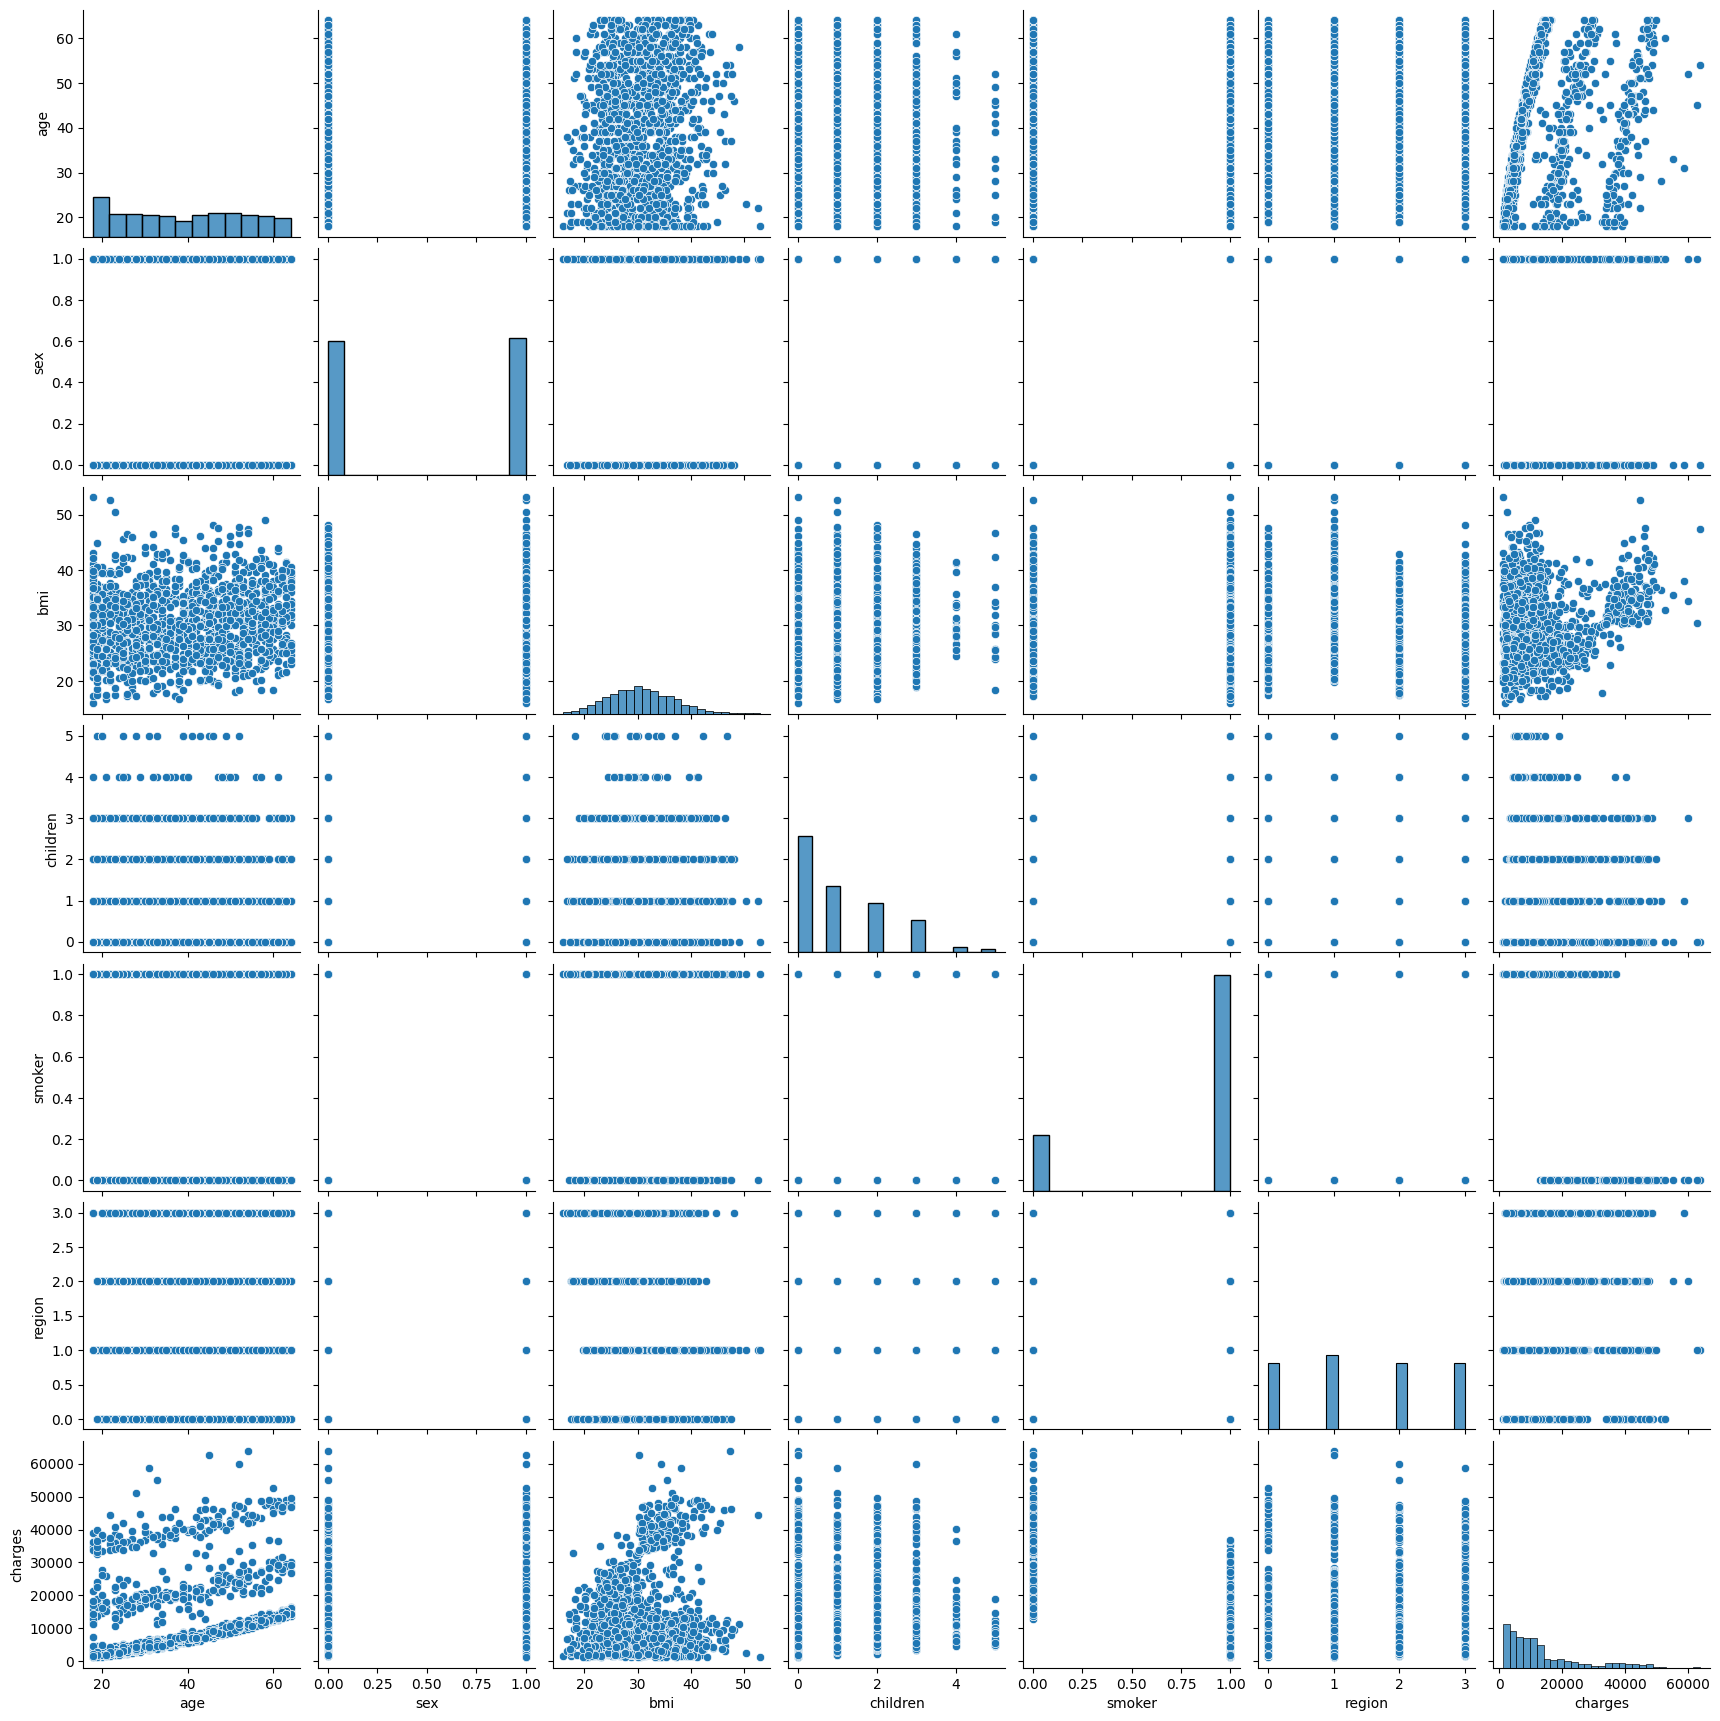

In [18]:
sns.pairplot(
    data = df
)

### Feature Engineering

In [19]:
stats = df.describe()
stats

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,1.483919,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

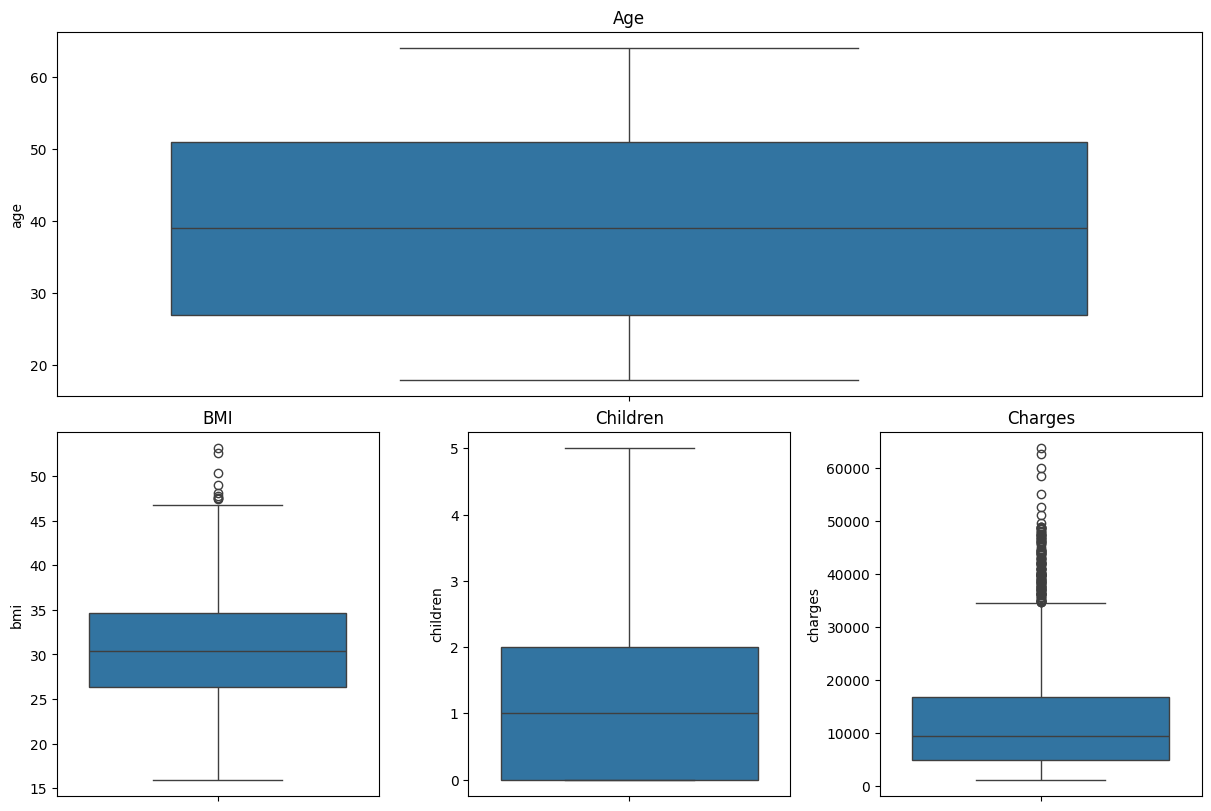

In [21]:
fig = plt.figure(
    constrained_layout=True,
    figsize = (
        12, 8
    )
)

gs = fig.add_gridspec(2, 3)

ax1 = fig.add_subplot(
    gs[0, :]
)
ax2 = fig.add_subplot(
    gs[1, 0],
)
ax3 = fig.add_subplot(
    gs[1, 1]
)
ax4 = fig.add_subplot(
    gs[1, 2]
)

ax1.set_title('Age')
ax2.set_title('BMI')
ax3.set_title('Children')
ax4.set_title('Charges')

sns.boxplot(
    y = 'age',
    data = df,
    ax = ax1
)
sns.boxplot(
    y = 'bmi',
    data = df,
    ax = ax2
)
sns.boxplot(
    y = 'children',
    data = df,
    ax = ax3
)
sns.boxplot(
    y = 'charges',
    data = df,
    ax = ax4
)

plt.show()

### Feature Scaling

In [22]:
num_variables = [
    "age", 
    "bmi", 
    "children", 
    "sex", 
    "smoker", 
    "region", 
    "charges"
]

sklr = MinMaxScaler()
skl_ft = sklr.fit_transform(
    df[df.columns]
)

data_skld = pd.DataFrame(
    skl_ft, 
    index = df.index, 
    columns = df.columns
)

data_skld.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,0.0,0.000000,0.251611
1,0.000000,1.0,0.479150,0.2,1.0,0.333333,0.009636
2,0.217391,1.0,0.458434,0.6,1.0,0.333333,0.053115
3,0.326087,1.0,0.181464,0.0,1.0,0.666667,0.333010
4,0.304348,1.0,0.347592,0.0,1.0,0.666667,0.043816


In [42]:
x = data_skld.drop(
    'charges', 
    axis = 1
)
y = data_skld['charges']

xtrain, xtest, ytrain, ytest = train_test_split(
    x, 
    y, 
    test_size = 0.2,
    random_state = 42
)

s_model = SelectKBest(
    f_regression, 
    k = 6
)
s_model.fit(
    xtrain, 
    ytrain
)

xtrain_selection = pd.DataFrame(
    s_model.transform(xtrain), 
    columns = xtrain.columns[s_model.get_support()]
)
xtest_selection = pd.DataFrame(
    s_model.transform(xtest), 
    columns = xtrain.columns[s_model.get_support()]
)

In [43]:
xtrain_selection.head()

,age,sex,bmi,children,smoker,region
0,0.108696,1.0,0.230024,0.0,1.0,1.000000
1,0.065217,1.0,0.263250,0.4,1.0,1.000000
2,0.739130,0.0,0.580172,0.4,1.0,0.666667
3,0.978261,1.0,0.686306,0.0,1.0,0.333333
4,0.630435,0.0,0.286252,0.4,1.0,1.000000


In [44]:
xtest_selection.head()

,age,sex,bmi,children,smoker,region
0,0.673913,1.0,0.176352,0.0,1.0,1.000000
1,0.239130,0.0,0.259349,0.8,1.0,0.000000
2,0.717391,0.0,0.549502,0.6,1.0,0.666667
3,0.282609,1.0,0.495830,0.6,0.0,0.666667
4,0.282609,1.0,0.603444,0.4,1.0,0.333333


In [45]:
xtrain_selection["charges"] = ytrain.values
xtest_selection["charges"] = ytest.values
xtrain_selection.to_csv("../data/processed/clean_train.csv", index = False)
xtest_selection.to_csv("../data/processed/clean_test.csv", index = False)

### Linear Regression Model

In [46]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")
train_data.head()

,age,sex,bmi,children,smoker,region,charges
0,0.108696,1.0,0.230024,0.0,1.0,1.000000,0.020339
1,0.065217,1.0,0.263250,0.4,1.0,1.000000,0.034446
2,0.739130,0.0,0.580172,0.4,1.0,0.666667,0.516374
3,0.978261,1.0,0.686306,0.0,1.0,0.333333,0.196070
4,0.630435,0.0,0.286252,0.4,1.0,1.000000,0.137177


#### Train and Test Data Graphed

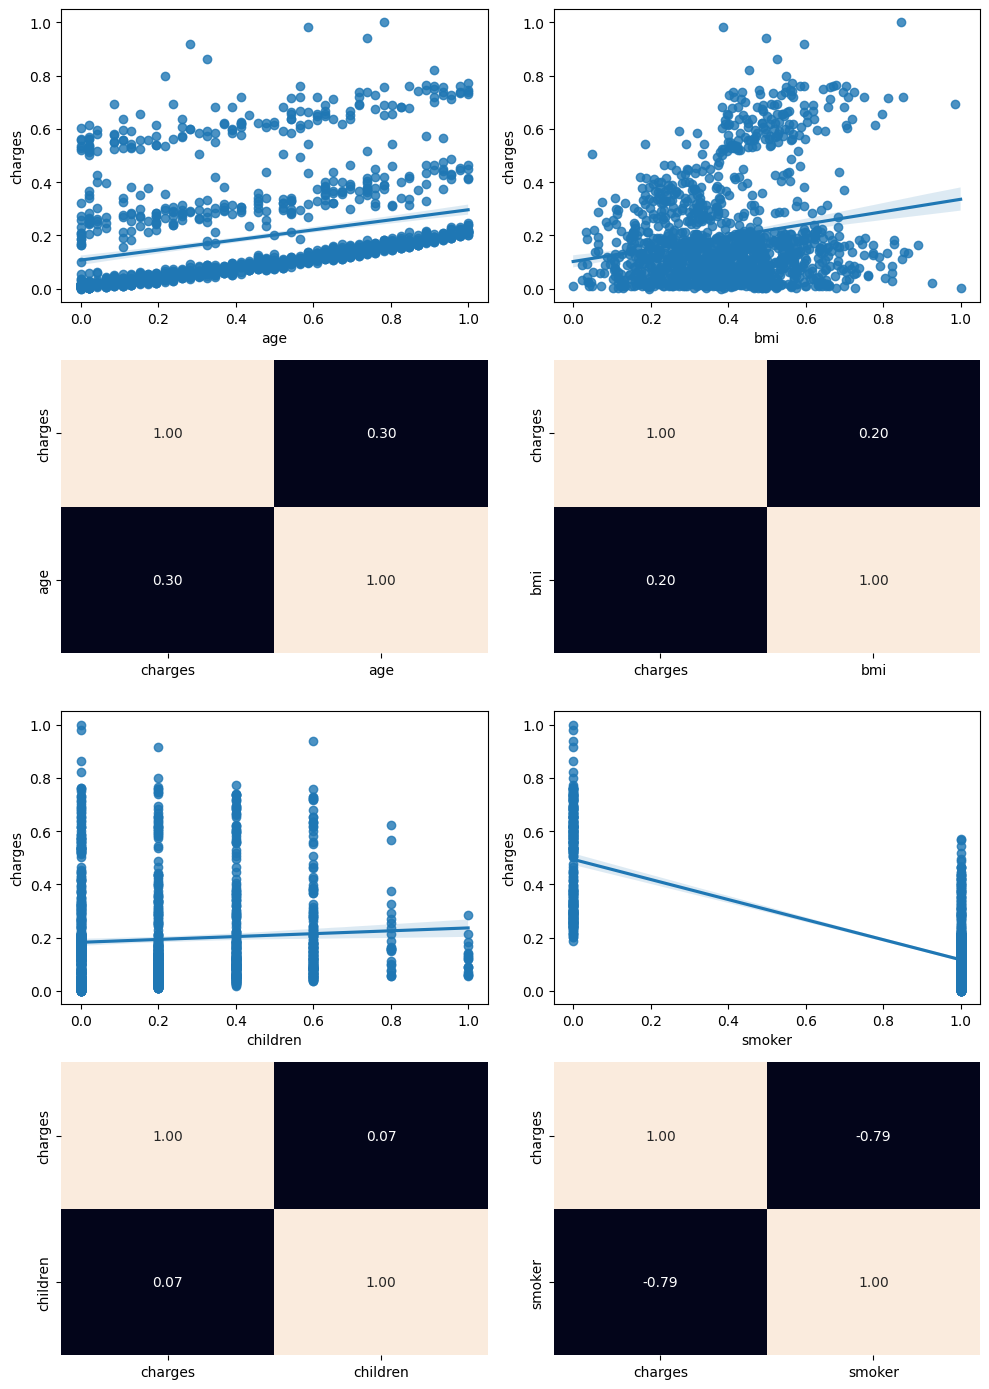

In [49]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

## Age - Charges
sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

## BMI - Charges
sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

## Children - Charges
sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

## Smoker - Charges
sns.regplot(data = total_data, x = "smoker", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [52]:
xtrain = train_data.drop(
    ['charges'], 
    axis = 1
)
ytrain = train_data['charges']

xtest = test_data.drop(
    ['charges'],
    axis = 1
)
ytest = test_data['charges']

In [54]:
LRModel = LinearRegression()
LRModel.fit(xtrain, ytrain)

LinearRegression()

In [56]:
print(f"Intercep (a): {LRModel.intercept_}")
print(f"Coefficients (b1, b2): {LRModel.coef_}")

Intercep (a): 0.31344235743138016
Coefficients (b1, b2): [ 0.18265621 -0.00159134  0.185474    0.04262835 -0.36795985  0.01137896]


In [57]:
yprediction = LRModel.predict(xtest)
yprediction

array([ 0.11107321,  0.07136633,  0.21159985,  0.4885978 ,  0.12827883,
        0.1953619 ,  0.4650671 ,  0.00298129,  0.15527176,  0.16366977,
        0.14941043,  0.51132843,  0.47551792,  0.25614271,  0.15186728,
        0.13172488,  0.04538604,  0.49164921,  0.0313305 ,  0.06949194,
        0.0422447 ,  0.46343277,  0.22275094,  0.46533839,  0.47824218,
        0.07020344,  0.55138865,  0.56265373,  0.16243162,  0.20662249,
        0.0838539 ,  0.18861147, -0.00706463,  0.17280237,  0.61711555,
        0.17605964,  0.05515378,  0.04620457,  0.47927158,  0.1293109 ,
        0.09172841,  0.46152601,  0.54033827,  0.17636648,  0.1012115 ,
        0.03429084,  0.07821545,  0.12283684,  0.05107612,  0.12985632,
        0.09106233,  0.17186162,  0.47907249,  0.04230001,  0.1552407 ,
        0.14147695,  0.1536126 ,  0.02209835,  0.48248129,  0.13285859,
        0.23376452,  0.11636993,  0.18381706,  0.0059923 ,  0.24947555,
        0.15176155,  0.1484482 ,  0.47020092,  0.37440304,  0.24

In [67]:
print(
    " **********************\n",
    "* Evaluation Metrics *\n",
    "**********************\n",
    '\t|-> Mean Squared Error:', mean_squared_error(ytest, yprediction), '\n'
    " \t|-> R2 Score:", r2_score(ytest, yprediction)
)

 **********************
 * Evaluation Metrics *
 **********************
 	|-> Mean Squared Error: 0.009043194261536824 
 	|-> R2 Score: 0.8068466322629111
